In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [3]:
# 1. load up the data
survey_data = pd.read_csv('hci_survey_data.csv')


In [ ]:
# 2. investigate the dataset
print(survey_data.describe())
print('\n')

print("Value Counts by Category:")
print(survey_data['degree_program'].value_counts())
print(survey_data['time_in_canberra'].value_counts())

       interactive_activities_likert  attend_in_person_likert  \
count                      75.000000                75.000000   
mean                        3.360000                 3.146667   
std                         1.301143                 1.237842   
min                         1.000000                 1.000000   
25%                         2.000000                 2.000000   
50%                         3.000000                 3.000000   
75%                         4.000000                 4.000000   
max                         5.000000                 5.000000   

       watch_online_likert  
count            75.000000  
mean              2.840000  
std               1.385641  
min               1.000000  
25%               2.000000  
50%               3.000000  
75%               4.000000  
max               5.000000  


Value Counts by Category:
degree_program
undergraduate    48
postgraduate     27
Name: count, dtype: int64
time_in_canberra
<1 year      33
1-3 years  

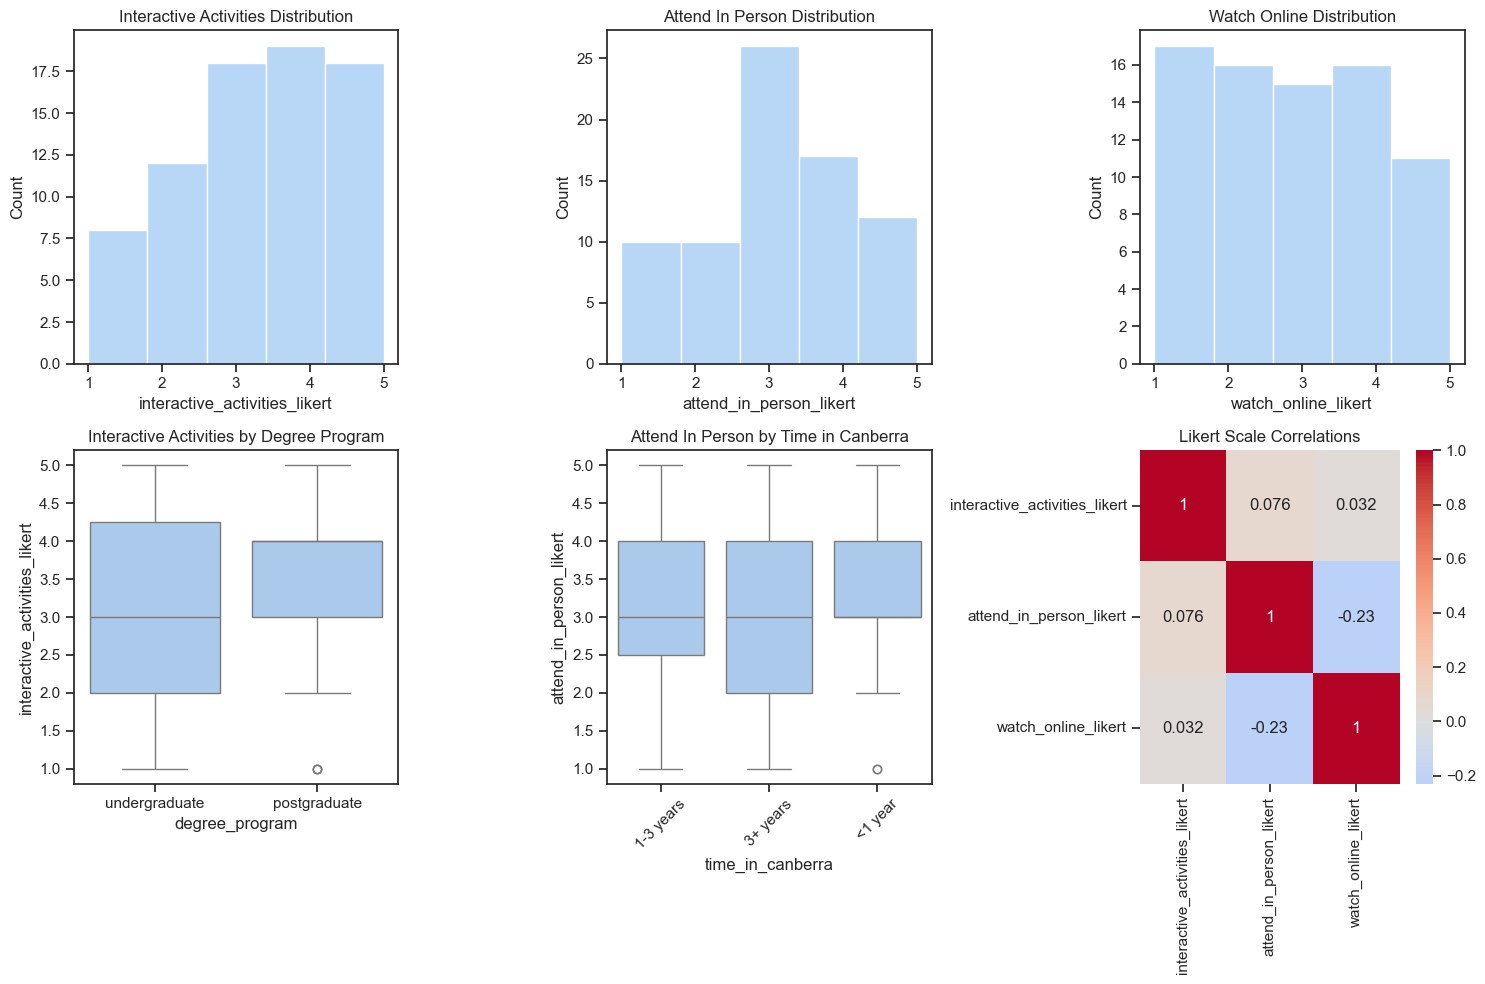

In [16]:
# 3. plot the data
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(data=survey_data, x='interactive_activities_likert', bins=5)
plt.title('Interactive Activities Distribution')

plt.subplot(2, 3, 2)
sns.histplot(data=survey_data, x='attend_in_person_likert', bins=5)
plt.title('Attend In Person Distribution')

plt.subplot(2, 3, 3)
sns.histplot(data=survey_data, x='watch_online_likert', bins=5)
plt.title('Watch Online Distribution')

plt.subplot(2, 3, 4)
sns.boxplot(data=survey_data, x='degree_program', y='interactive_activities_likert')
plt.title('Interactive Activities by Degree Program')

plt.subplot(2, 3, 5)
sns.boxplot(data=survey_data, x='time_in_canberra', y='attend_in_person_likert')
plt.title('Attend In Person by Time in Canberra')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
correlation_matrix = survey_data[['interactive_activities_likert', 'attend_in_person_likert', 'watch_online_likert']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Likert Scale Correlations')

plt.tight_layout()
plt.show()

<Axes: xlabel='degree_program', ylabel='interactive_activities_likert'>

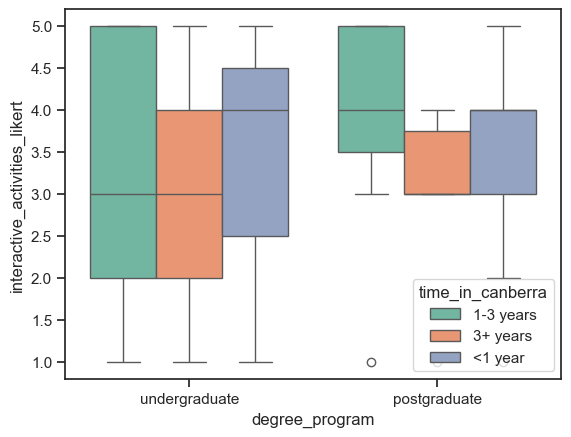

In [20]:
# nested boxplots 
sns.boxplot(data=survey_data, x='degree_program', y='interactive_activities_likert', hue='time_in_canberra', palette='Set2')

In [ ]:
# 4. run some statistical tests

undergrad_interactive = survey_data[survey_data['degree_program'] == 'undergraduate']['interactive_activities_likert']
postgrad_interactive = survey_data[survey_data['degree_program'] == 'postgraduate']['interactive_activities_likert']

t_stat, p_value = stats.ttest_ind(undergrad_interactive, postgrad_interactive)
print(f"\nT-test: Interactive Activities by Degree Program")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

statistic, p_val = stats.chi2_contingency(pd.crosstab(survey_data['degree_program'], survey_data['time_in_canberra']))[:2]
print(f"\nChi-square test: Degree Program vs Time in Canberra")
print(f"Chi-square statistic: {statistic:.4f}")
print(f"P-value: {p_val:.4f}")

print(f"\nCrosstab:")

print(pd.crosstab(survey_data['degree_program'], survey_data['time_in_canberra']))


T-test: Interactive Activities by Degree Program
T-statistic: -0.7893
P-value: 0.4325

Chi-square test: Degree Program vs Time in Canberra
Chi-square statistic: 1.0615
P-value: 0.5882

Crosstab:
time_in_canberra  1-3 years  3+ years  <1 year
degree_program                                
postgraduate              7         6       14
undergraduate            16        13       19
